In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("placement.csv")

In [2]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

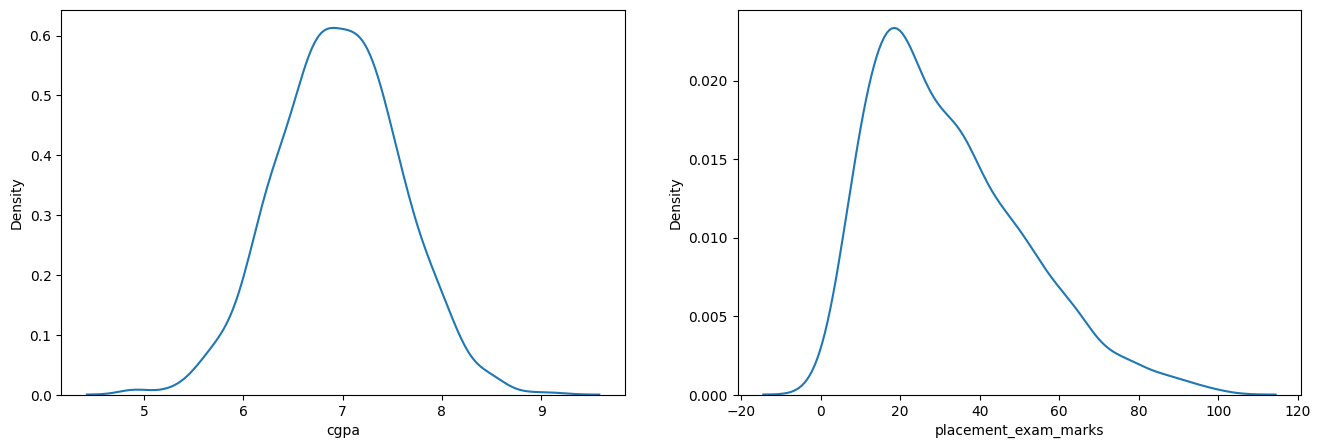

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df["cgpa"])

plt.subplot(122)
sns.kdeplot(df["placement_exam_marks"])

In [4]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

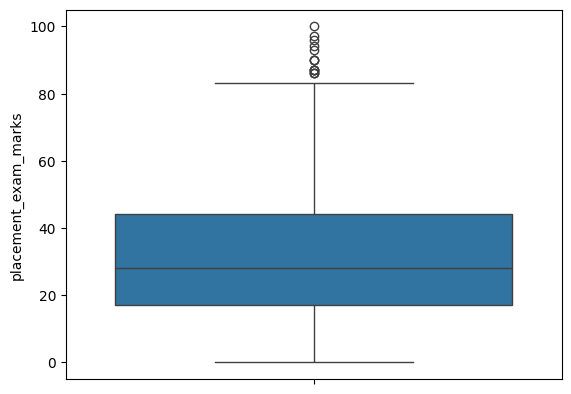

In [5]:
sns.boxplot(df["placement_exam_marks"])

In [6]:
import plotly.express as px
px.box(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

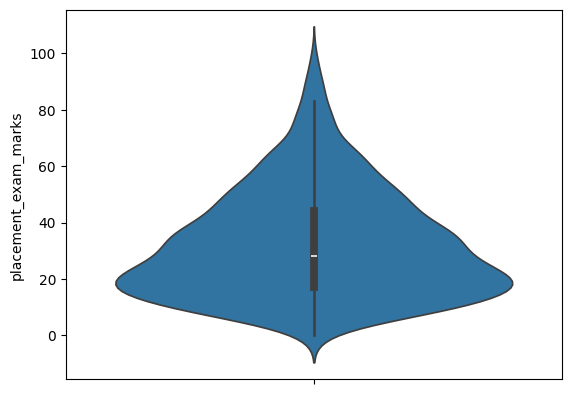

In [9]:
sns.violinplot(df["placement_exam_marks"])

In [11]:
# Finding the IQR
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

In [15]:
iqr= percentile75-percentile25

In [16]:
iqr

27.0

In [17]:
# Finding the limits 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [18]:
upper_limit

84.5

In [19]:
lower_limit

-23.5

In [21]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [22]:
nw_df=df[df["placement_exam_marks"] < upper_limit]

In [23]:
nw_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


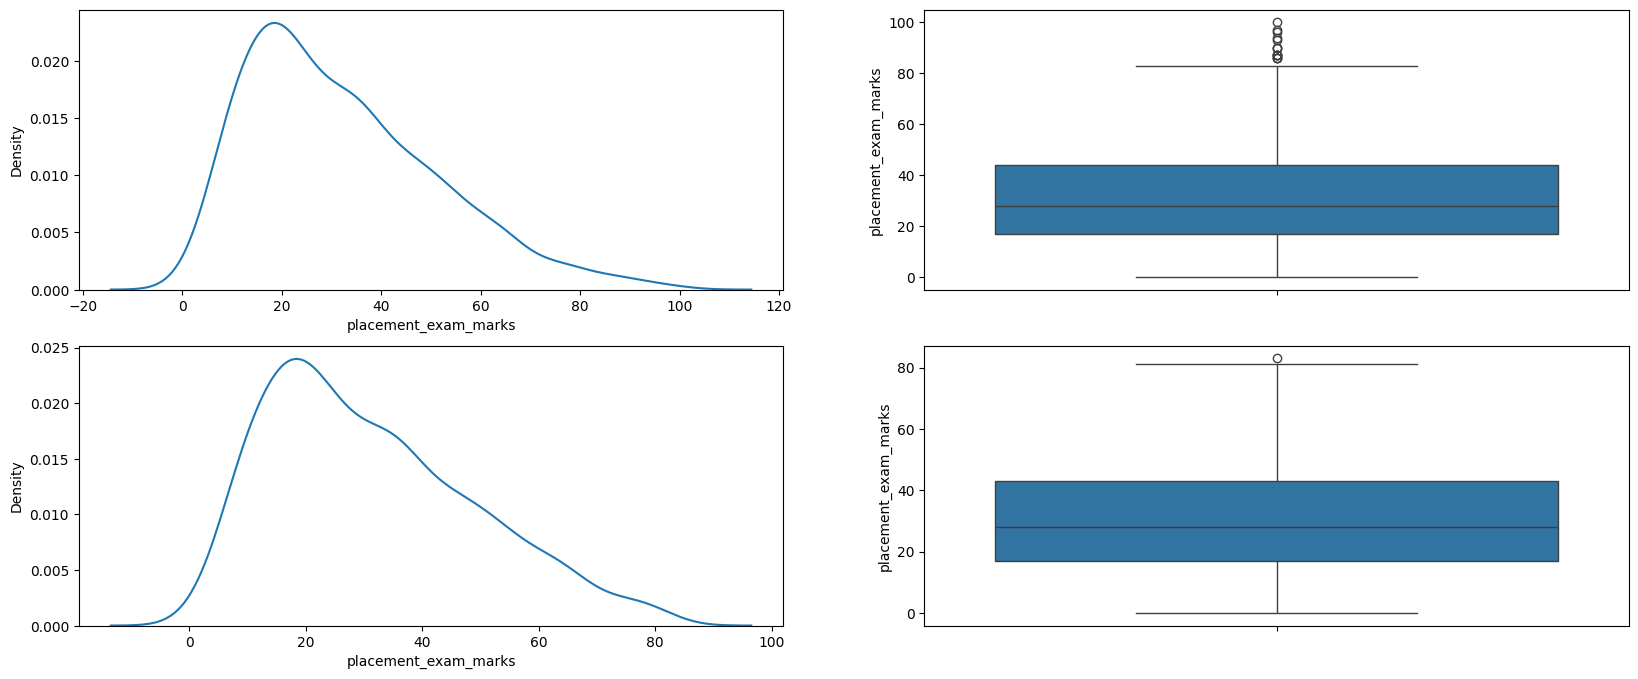

In [32]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.kdeplot(df["placement_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(df["placement_exam_marks"])

plt.subplot(2,2,3)
sns.kdeplot(nw_df["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(nw_df["placement_exam_marks"])
plt.show()

## Capping

In [38]:
new_df_cap=df.copy()

new_df_cap["placement_exam_marks"]=np.where(new_df_cap["placement_exam_marks"]>upper_limit,upper_limit,new_df_cap["placement_exam_marks"])

In [39]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [40]:
new_df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64